In [1]:
import pandas as pd
import numpy as np

In [2]:
a=pd.read_csv('/content/_bridges_sample.csv')

In [3]:
a

,Structure_id,District,Detour_Km,Toll,Maintainer,Urban,Status,Year,Lanes_on,Lanes_under,...,Spans,Length,Width,Deck_rating,Superstr_rating,Substr_rating,Rated_load,Trucks_percent,Scour_rating,Future_traffic
0,000021521-00101,District2,199,Free,Agency,Rural,Local,2005,1,0,...,2,31.4,4.3,Good,Very Good,Very Good,41.7,0.0,Dry,1
1,000021521-00181,District2,199,Free,Agency,Rural,Local,2005,1,0,...,1,15.5,4.3,Good,Good,Very Good,41.7,0.0,Dry,1
2,000021521-TMP20,District2,199,Free,Agency,Rural,Local,2012,2,0,...,1,10.1,8.4,Very Good,Very Good,Very Good,48.1,0.0,Dry,150
3,000021525-00012,District2,199,Free,Agency,Rural,Local,1950,1,0,...,14,45.4,3.7,Good,Good,Poor,10.0,0.0,Dry,120
4,000021580-00092,District2,6,Free,Agency,Rural,Local,2004,2,0,...,1,25.0,7.3,Good,Very Good,Very Good,37.2,4.0,Dry,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34288,DAPFORHOO000012,District9,0,Free,Military,Urban,Local,1994,3,0,...,3,45.4,19.0,Good,Good,Good,64.3,40.0,No waterway,600
34289,DAPFORHOO000013,District9,0,Free,Military,Urban,Local,2000,2,0,...,1,12.3,10.8,Good,Good,Good,35.1,40.0,No waterway,600
34290,DAPFORHOO000015,District9,0,Free,Military,Urban,Minor,1996,2,7,...,4,73.2,9.8,Good,Good,Good,24.5,25.0,No waterway,1500
34291,DAPFORHOO00005A,District9,0,Free,Military,Urban,Local,1991,2,0,...,2,27.8,10.4,Good,Good,Satisfactory,53.3,15.0,Stable,300


In [4]:
a.columns

Index(['Structure_id', 'District', 'Detour_Km', 'Toll', 'Maintainer', 'Urban',
       'Status', 'Year', 'Lanes_on', 'Lanes_under', 'AverageDaily', 'Historic',
       'Service_under', 'Material', 'Design', 'Spans', 'Length', 'Width',
       'Deck_rating', 'Superstr_rating', 'Substr_rating', 'Rated_load',
       'Trucks_percent', 'Scour_rating', 'Future_traffic'],
      dtype='object')

In [6]:
a["Design"].value_counts()

Beam          28326
Slab           4340
Other          1244
Arch            160
Truss           137
Frame            68
Movable          13
Suspension        5
Name: Design, dtype: int64

<Axes: >

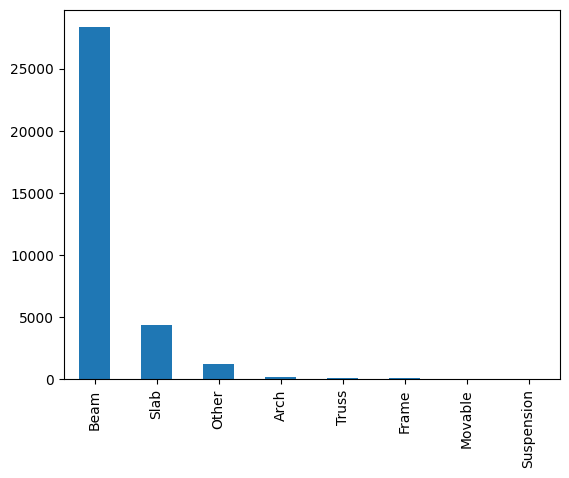

In [7]:
a["Design"].value_counts().plot(kind='bar')

<Axes: ylabel='Design'>

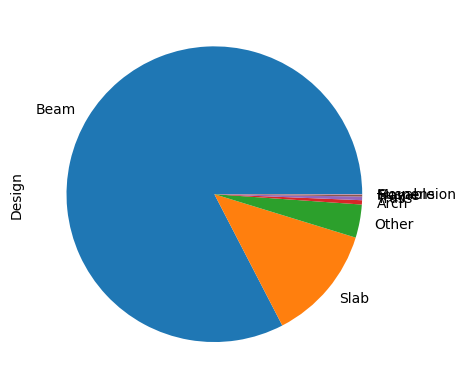

In [8]:
a["Design"].value_counts().plot(kind='pie')

In [9]:
a["Design"].unique()

array(['Slab', 'Beam', 'Truss', 'Other', 'Arch', 'Suspension', 'Frame',
       'Movable'], dtype=object)

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
encoder=LabelEncoder()

In [12]:
ecoded=encoder.fit_transform(a["Design"])

In [14]:
ecoded

array([5, 5, 1, ..., 1, 1, 1])

In [15]:
a["Design"]=ecoded

In [16]:
a["Design"]

0        5
1        5
2        1
3        1
4        1
        ..
34288    1
34289    1
34290    1
34291    1
34292    1
Name: Design, Length: 34293, dtype: int64

In [17]:
a.corr()["Design"]

<ipython-input-17-101fca290874>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  a.corr()["Design"]


Detour_Km         0.046346
Year             -0.252697
Lanes_on         -0.081618
Lanes_under      -0.168319
AverageDaily     -0.116894
Design            1.000000
Spans            -0.002585
Length           -0.119950
Width            -0.123956
Rated_load       -0.233885
Trucks_percent    0.002565
Future_traffic   -0.118224
Name: Design, dtype: float64

In [19]:
a.columns

Index(['Structure_id', 'District', 'Detour_Km', 'Toll', 'Maintainer', 'Urban',
       'Status', 'Year', 'Lanes_on', 'Lanes_under', 'AverageDaily', 'Historic',
       'Service_under', 'Material', 'Design', 'Spans', 'Length', 'Width',
       'Deck_rating', 'Superstr_rating', 'Substr_rating', 'Rated_load',
       'Trucks_percent', 'Scour_rating', 'Future_traffic'],
      dtype='object')

In [22]:
columns_to_encode = ['District', 'Toll', 'Maintainer', 'Urban', 'Status', 'Historic', 'Service_under', 'Material', 'Deck_rating', 'Superstr_rating', 'Substr_rating', 'Scour_rating']
for column in columns_to_encode:
    a[column] = encoder.fit_transform(a[column])

In [23]:
a

,Structure_id,District,Detour_Km,Toll,Maintainer,Urban,Status,Year,Lanes_on,Lanes_under,...,Spans,Length,Width,Deck_rating,Superstr_rating,Substr_rating,Rated_load,Trucks_percent,Scour_rating,Future_traffic
0,000021521-00101,12,199,0,0,0,2,2005,1,0,...,2,31.4,4.3,5,9,9,41.7,0.0,1,1
1,000021521-00181,12,199,0,0,0,2,2005,1,0,...,1,15.5,4.3,5,5,9,41.7,0.0,1,1
2,000021521-TMP20,12,199,0,0,0,2,2012,2,0,...,1,10.1,8.4,9,9,9,48.1,0.0,1,150
3,000021525-00012,12,199,0,0,0,2,1950,1,0,...,14,45.4,3.7,5,5,6,10.0,0.0,1,120
4,000021580-00092,12,6,0,0,0,2,2004,2,0,...,1,25.0,7.3,5,9,9,37.2,4.0,1,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34288,DAPFORHOO000012,26,0,0,2,1,2,1994,3,0,...,3,45.4,19.0,5,5,5,64.3,40.0,2,600
34289,DAPFORHOO000013,26,0,0,2,1,2,2000,2,0,...,1,12.3,10.8,5,5,5,35.1,40.0,2,600
34290,DAPFORHOO000015,26,0,0,2,1,3,1996,2,7,...,4,73.2,9.8,5,5,5,24.5,25.0,2,1500
34291,DAPFORHOO00005A,26,0,0,2,1,2,1991,2,0,...,2,27.8,10.4,5,5,7,53.3,15.0,4,300


In [26]:
a.drop(columns=["Structure_id"],inplace=True)

In [27]:
a

,District,Detour_Km,Toll,Maintainer,Urban,Status,Year,Lanes_on,Lanes_under,AverageDaily,...,Spans,Length,Width,Deck_rating,Superstr_rating,Substr_rating,Rated_load,Trucks_percent,Scour_rating,Future_traffic
0,12,199,0,0,0,2,2005,1,0,1,...,2,31.4,4.3,5,9,9,41.7,0.0,1,1
1,12,199,0,0,0,2,2005,1,0,1,...,1,15.5,4.3,5,5,9,41.7,0.0,1,1
2,12,199,0,0,0,2,2012,2,0,100,...,1,10.1,8.4,9,9,9,48.1,0.0,1,150
3,12,199,0,0,0,2,1950,1,0,80,...,14,45.4,3.7,5,5,6,10.0,0.0,1,120
4,12,6,0,0,0,2,2004,2,0,150,...,1,25.0,7.3,5,9,9,37.2,4.0,1,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34288,26,0,0,2,1,2,1994,3,0,300,...,3,45.4,19.0,5,5,5,64.3,40.0,2,600
34289,26,0,0,2,1,2,2000,2,0,300,...,1,12.3,10.8,5,5,5,35.1,40.0,2,600
34290,26,0,0,2,1,3,1996,2,7,1200,...,4,73.2,9.8,5,5,5,24.5,25.0,2,1500
34291,26,0,0,2,1,2,1991,2,0,300,...,2,27.8,10.4,5,5,7,53.3,15.0,4,300


In [28]:
a.isnull().sum()

District           0
Detour_Km          0
Toll               0
Maintainer         0
Urban              0
Status             0
Year               0
Lanes_on           0
Lanes_under        0
AverageDaily       0
Historic           0
Service_under      0
Material           0
Design             0
Spans              0
Length             0
Width              0
Deck_rating        0
Superstr_rating    0
Substr_rating      0
Rated_load         0
Trucks_percent     0
Scour_rating       0
Future_traffic     0
dtype: int64

In [30]:


x = a.drop('Design', axis=1)
y = a['Design']


In [31]:
x

,District,Detour_Km,Toll,Maintainer,Urban,Status,Year,Lanes_on,Lanes_under,AverageDaily,...,Spans,Length,Width,Deck_rating,Superstr_rating,Substr_rating,Rated_load,Trucks_percent,Scour_rating,Future_traffic
0,12,199,0,0,0,2,2005,1,0,1,...,2,31.4,4.3,5,9,9,41.7,0.0,1,1
1,12,199,0,0,0,2,2005,1,0,1,...,1,15.5,4.3,5,5,9,41.7,0.0,1,1
2,12,199,0,0,0,2,2012,2,0,100,...,1,10.1,8.4,9,9,9,48.1,0.0,1,150
3,12,199,0,0,0,2,1950,1,0,80,...,14,45.4,3.7,5,5,6,10.0,0.0,1,120
4,12,6,0,0,0,2,2004,2,0,150,...,1,25.0,7.3,5,9,9,37.2,4.0,1,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34288,26,0,0,2,1,2,1994,3,0,300,...,3,45.4,19.0,5,5,5,64.3,40.0,2,600
34289,26,0,0,2,1,2,2000,2,0,300,...,1,12.3,10.8,5,5,5,35.1,40.0,2,600
34290,26,0,0,2,1,3,1996,2,7,1200,...,4,73.2,9.8,5,5,5,24.5,25.0,2,1500
34291,26,0,0,2,1,2,1991,2,0,300,...,2,27.8,10.4,5,5,7,53.3,15.0,4,300


In [32]:
y

0        5
1        5
2        1
3        1
4        1
        ..
34288    1
34289    1
34290    1
34291    1
34292    1
Name: Design, Length: 34293, dtype: int64

In [33]:

from sklearn.model_selection import train_test_split

In [34]:

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 0)


In [35]:
xtrain.shape

(25719, 23)

In [36]:
xtest.shape


(8574, 23)

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier


In [38]:


gbc = GradientBoostingClassifier()
gbc.fit(xtrain, ytrain)
ypred_gbc = gbc.predict(xtest)

rfc = RandomForestClassifier()
rfc.fit(xtrain, ytrain)
ypred_rfc = rfc.predict(xtest)


In [39]:


from sklearn.metrics import accuracy_score

accuracy_gbc = accuracy_score(ytest, ypred_gbc)
accuracy_rfc = accuracy_score(ytest, ypred_rfc)

print("Accuracy of Gradient Boosting Classifier:", accuracy_gbc)
print("Accuracy of Random Forest Classifier:", accuracy_rfc)


Accuracy of Gradient Boosting Classifier: 0.9127595054816888
Accuracy of Random Forest Classifier: 0.9239561464893865


In [40]:


from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(xtrain, ytrain)
ypred_xgb = xgb.predict(xtest)

accuracy_xgb = accuracy_score(ytest, ypred_xgb)

print("Accuracy of XGBoost Classifier:", accuracy_xgb)


Accuracy of XGBoost Classifier: 0.937368789363191


In [41]:


from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(xtrain, ytrain)
ypred_lr = lr.predict(xtest)

accuracy_lr = accuracy_score(ytest, ypred_lr)

print("Accuracy of Logistic Regression:", accuracy_lr)


Accuracy of Logistic Regression: 0.8220200606484721


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:

from sklearn.svm import SVC

svm = SVC()
svm.fit(xtrain, ytrain)
ypred_svm = svm.predict(xtest)

accuracy_svm = accuracy_score(ytest, ypred_svm)

print("Accuracy of SVM:", accuracy_svm)


Accuracy of SVM: 0.8220200606484721


In [43]:


from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(xtrain, ytrain)
ypred_dt = dt.predict(xtest)

accuracy_dt = accuracy_score(ytest, ypred_dt)

print("Accuracy of Decision Tree:", accuracy_dt)


Accuracy of Decision Tree: 0.9014462327968277


In [44]:


from sklearn.model_selection import GridSearchCV

params = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}

grid_search = GridSearchCV(xgb, params, cv=5)
grid_search.fit(xtrain, ytrain)

print("Best parameters:", grid_search.best_params_)

best_xgb = grid_search.best_estimator_

ypred_best_xgb = best_xgb.predict(xtest)
accuracy_best_xgb = accuracy_score(ytest, ypred_best_xgb)

print("Accuracy of best XGBoost Classifier:", accuracy_best_xgb)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
Accuracy of best XGBoost Classifier: 0.9412176347095871


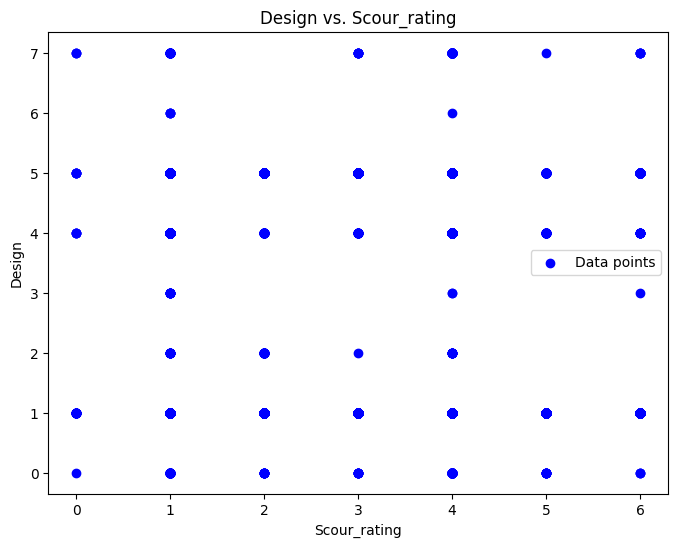

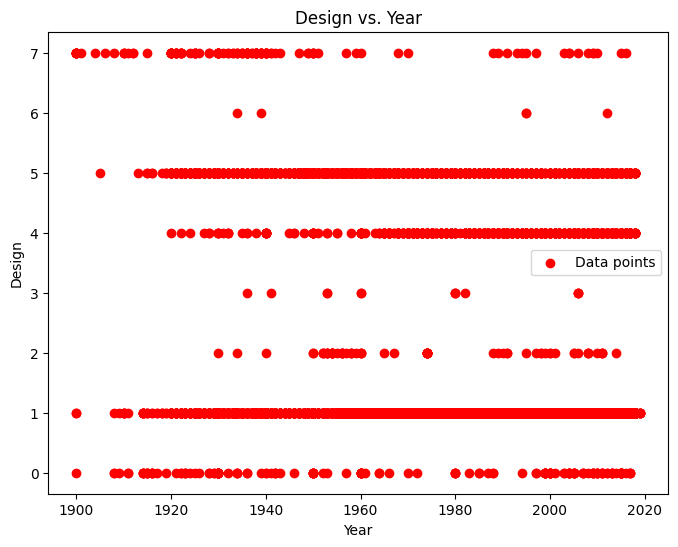

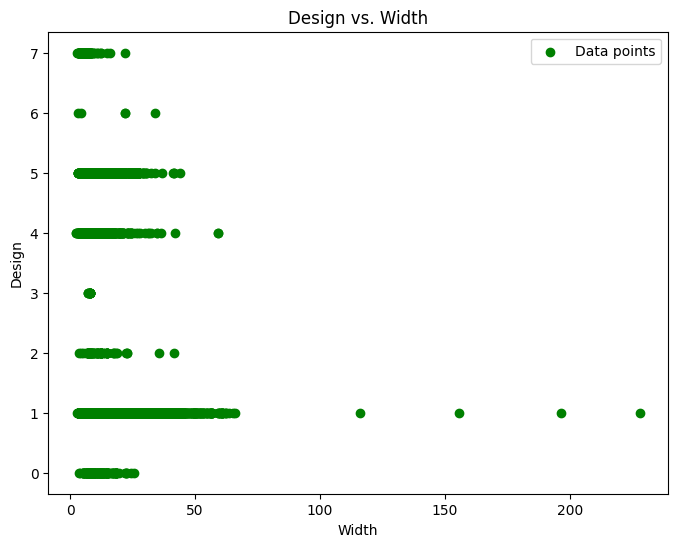

In [45]:

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(a['Scour_rating'], a['Design'], color='blue', label='Data points')
plt.xlabel('Scour_rating')
plt.ylabel('Design')
plt.title('Design vs. Scour_rating')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(a['Year'], a['Design'], color='red', label='Data points')
plt.xlabel('Year')
plt.ylabel('Design')
plt.title('Design vs. Year')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(a['Width'], a['Design'], color='green', label='Data points')
plt.xlabel('Width')
plt.ylabel('Design')
plt.title('Design vs. Width')
plt.legend()
plt.show()



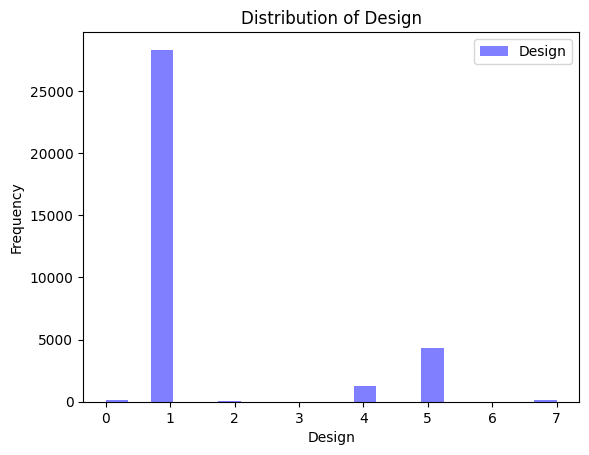

In [47]:
import matplotlib.pyplot as plt

plt.hist(a['Design'], bins=20, color='blue', alpha=0.5, label='Design')

plt.xlabel('Design')
plt.ylabel('Frequency')
plt.title('Distribution of Design')
plt.legend()
plt.show()


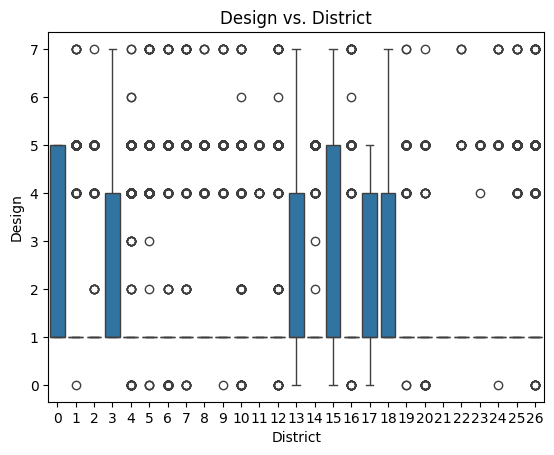

In [49]:
import seaborn as sns

sns.boxplot(x='District', y='Design', data=a)
plt.xlabel('District')
plt.ylabel('Design')
plt.title('Design vs. District')
plt.show()


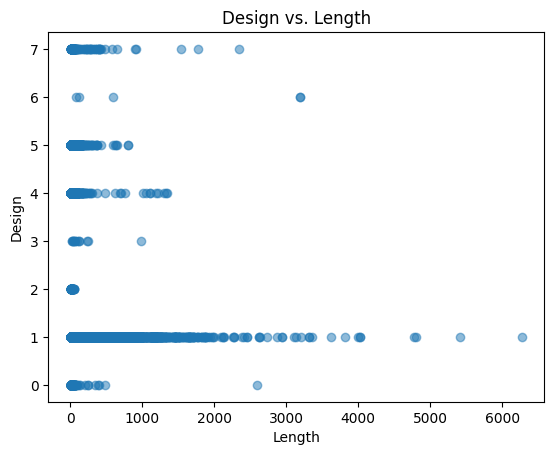

In [51]:

plt.scatter(a['Length'], a['Design'], alpha=0.5)
plt.xlabel('Length')
plt.ylabel('Design')
plt.title('Design vs. Length')
plt.show()


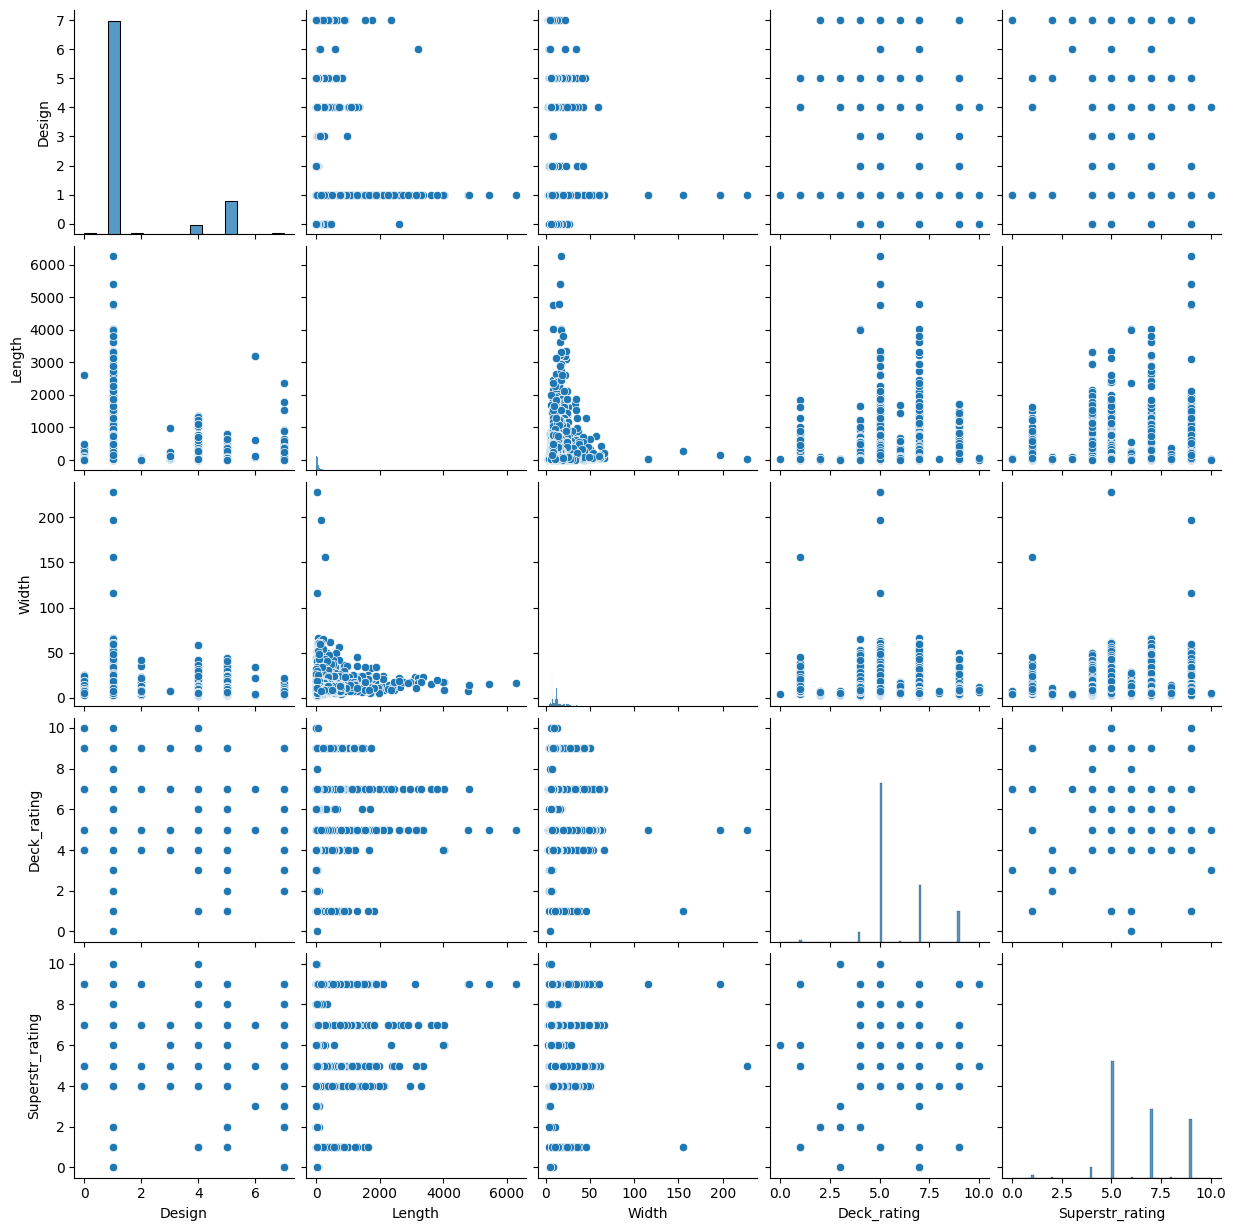

In [53]:

sns.pairplot(a[['Design', 'Length', 'Width', 'Deck_rating', 'Superstr_rating']])
plt.show()


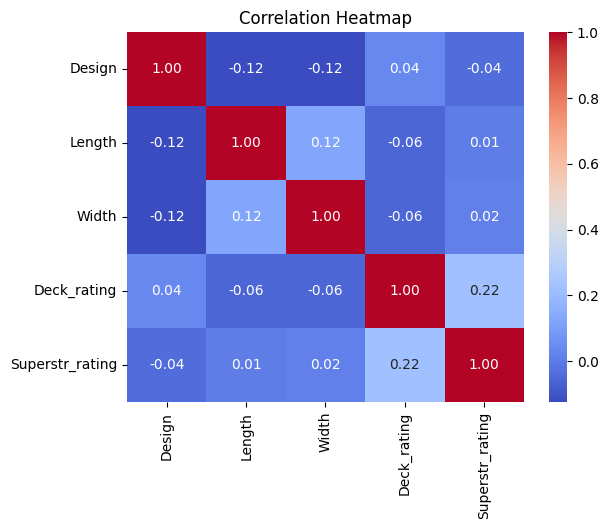

In [55]:

corr_matrix = a[['Design', 'Length', 'Width', 'Deck_rating', 'Superstr_rating']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


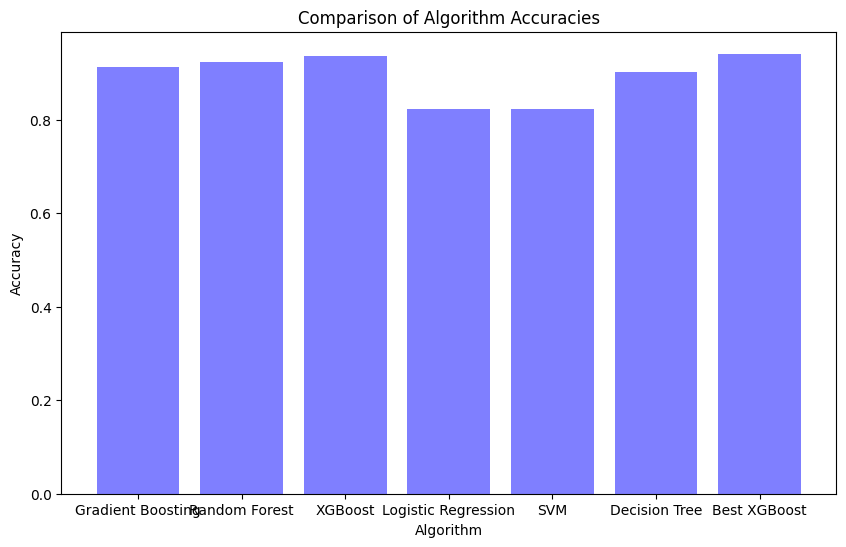

In [56]:

labels = ['Gradient Boosting', 'Random Forest', 'XGBoost', 'Logistic Regression', 'SVM', 'Decision Tree', 'Best XGBoost']
accuracies = [accuracy_gbc, accuracy_rfc, accuracy_xgb, accuracy_lr, accuracy_svm, accuracy_dt, accuracy_best_xgb]

plt.figure(figsize=(10, 6))
plt.bar(labels, accuracies, color='blue', alpha=0.5)

plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Comparison of Algorithm Accuracies')
plt.show()
